Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9439 - loss: 0.1780 - val_accuracy: 0.9792 - val_loss: 0.0629
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9893 - loss: 0.0362 - val_accuracy: 0.9850 - val_loss: 0.0457
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9932 - loss: 0.0236 - val_accuracy: 0.9885 - val_loss: 0.0411
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9911 - val_loss: 0.0270
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9960 - loss: 0.0128 - val_accuracy: 0.9910 - val_loss: 0.0259
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8953 - loss: 0.3611 - val_accuracy: 0.9791 - val_loss: 0.0637
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9840 - loss: 0.0521 - val_accuracy: 0.9838 - val_loss: 0.0466
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9893 - loss: 0.0340 - val_accu

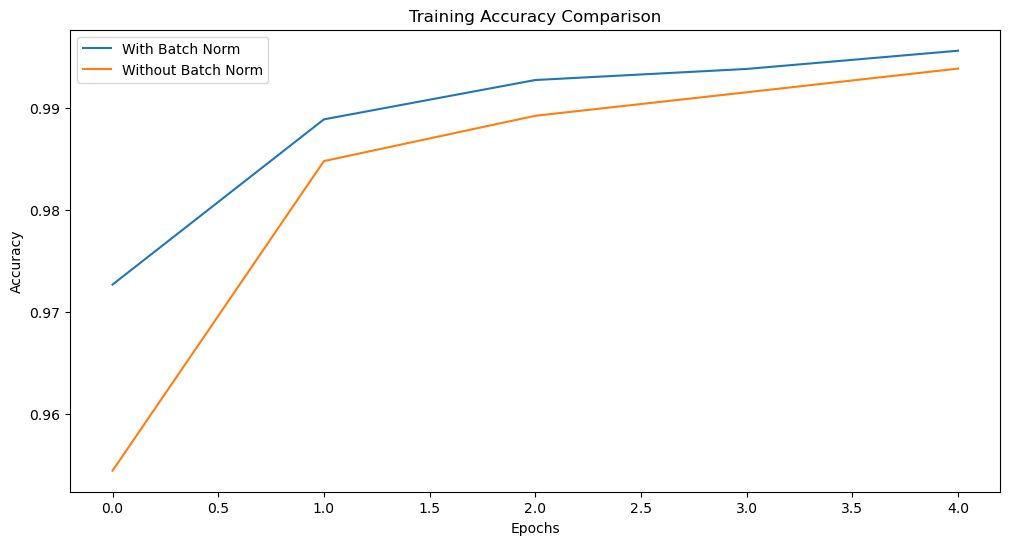

In [3]:
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


def build_model(batch_norm=False):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization() if batch_norm else layers.Lambda(lambda x: x),  # Conditionally add BatchNorm
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization() if batch_norm else layers.Lambda(lambda x: x),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization() if batch_norm else layers.Lambda(lambda x: x),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model


# Build and train both models
model_with_bn = build_model(batch_norm=True)
model_without_bn = build_model(batch_norm=False)

# Train both models and capture history
history_bn = model_with_bn.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)
history_no_bn = model_without_bn.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

# Evaluate both models
test_loss_bn, test_acc_bn = model_with_bn.evaluate(x_test, y_test, verbose=0)
test_loss_no_bn, test_acc_no_bn = model_without_bn.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy with Batch Normalization: {test_acc_bn:.4f}")
print(f"Test Accuracy without Batch Normalization: {test_acc_no_bn:.4f}")

# Plot training accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_bn.history['accuracy'], label='With Batch Norm')
plt.plot(history_no_bn.history['accuracy'], label='Without Batch Norm')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()